<a href="https://colab.research.google.com/github/jrenatom/tarefa1_PL_A1/blob/main/Tarefa4_F_PL_Python_4_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

Tarefa Trilha 4 - J. Renato Machado
<br>
<br>

---


# Exercícios

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [4]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [5]:
# Seu código
wnull = WHO.isnull().sum()

In [6]:
wmax = wnull.max()

In [8]:
display(wmax)

181

In [9]:
display(WHO.shape)

(183, 22)

In [10]:
display(wnull)

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64

O atributo "Total expenditure" tem o maior percentual 98% (181/183) de dados ausentes.

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

In [11]:
df = WHO
display(WHO.head())
display(WHO.describe())

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


,Year,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,6.000000,183.000000,174.000000,183.000000,181.000000,183.000000,183.000000,2.000000,183.000000,183.000000,154.000000,1.420000e+02,181.000000,181.000000,173.000000,173.000000
mean,2015.0,71.616940,152.863388,23.803279,5.288333,2.383906,82.425287,1502.901639,42.754144,31.612022,83.207650,7.080000,84.633880,0.660656,7185.331746,1.109741e+07,4.534807,4.575691,0.691740,12.927168
std,0.0,8.123706,97.561184,83.683762,4.038115,27.461032,24.008492,7842.394928,20.685702,107.779778,24.245778,1.527351,22.162793,1.344702,11697.508913,2.896230e+07,4.099425,4.180785,0.153412,2.912366
min,2015.0,51.000000,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000
25%,2015.0,65.750000,74.000000,0.000000,2.492500,0.000000,78.750000,0.000000,24.300000,0.000000,83.000000,6.540000,83.500000,0.100000,766.008101,2.680710e+05,1.500000,1.500000,0.565000,10.800000
50%,2015.0,73.900000,138.000000,2.000000,5.285000,0.000000,93.000000,17.000000,48.600000,3.000000,93.000000,7.080000,93.000000,0.100000,2916.228918,2.076086e+06,3.500000,3.400000,0.723000,13.100000
75%,2015.0,76.950000,213.000000,17.000000,8.017500,0.000000,97.000000,202.000000,61.400000,21.000000,97.000000,7.620000,97.000000,0.400000,7290.107448,9.940296e+06,6.500000,6.400000,0.798000,15.000000
max,2015.0,88.000000,484.000000,910.000000,10.660000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,8.160000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


In [13]:
df = WHO[WHO.Status =='Developing']

In [14]:
df

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [15]:
print('GDP Developing > GDP mean + GDP Std', df[df.GDP > (df.GDP.mean()+df.GDP.std()) ].Country)

GDP Developing > GDP mean + GDP Std 176                 Bahrain
208                Barbados
496                  Canada
930                  France
1266                 Israel
1394                 Kuwait
1926                   Oman
2071                  Qatar
2649    Trinidad and Tobago
2810                Uruguay
Name: Country, dtype: object


In [16]:
print('Verificação dos dados:')
display(WHO[WHO.Country =='France'])
display(WHO[WHO.Country =='Canada'])


Verificação dos dados:


,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
930,France,2015,Developing,82.4,78.0,2,NaN,0.0,86.0,157,...,98.0,NaN,98.0,0.1,36526.7711,6662468.0,0.7,0.6,0.894,16.3


,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
496,Canada,2015,Developing,82.2,64.0,2,NaN,0.0,55.0,195,...,91.0,NaN,91.0,0.1,43315.744,3584861.0,0.6,0.5,0.919,16.3


Os países França e Canada foram classificados de forma errada com o atributo Status = Developing.

# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

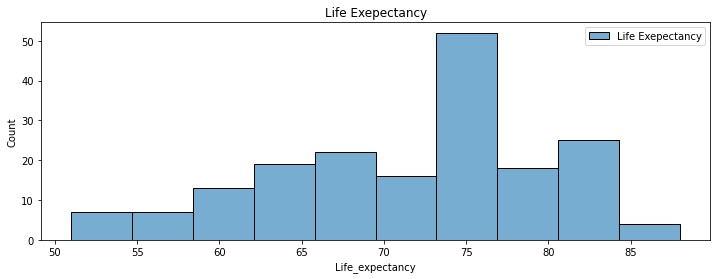

In [17]:
plt.figure(figsize=(12,4))
sns.histplot(WHO.Life_expectancy, alpha=0.6, label='Life Exepectancy')
plt.title('Life Exepectancy')
plt.legend()
plt.show()


In [18]:
display(WHO.Life_expectancy.describe())

count    183.000000
mean      71.616940
std        8.123706
min       51.000000
25%       65.750000
50%       73.900000
75%       76.950000
max       88.000000
Name: Life_expectancy, dtype: float64

A maioria dos países têm expectativa de vida em torno de 75 anos.

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

In [19]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df.corr()

In [23]:
df = WHO[WHO.Status =='Developing']

In [24]:
display(df[0:20])

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.000000,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.000000,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.000000,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.000000,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


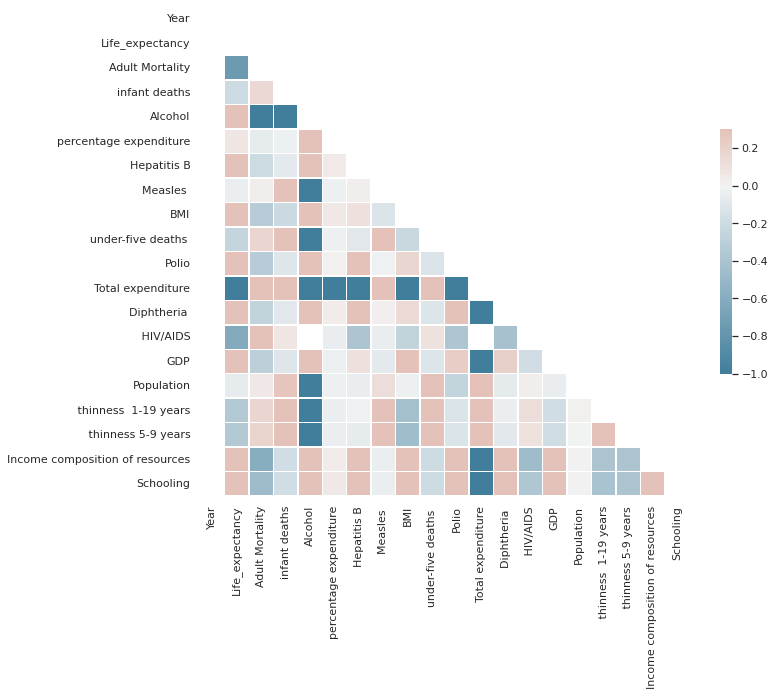

In [25]:
#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
display(corr.Life_expectancy)

Year                                    NaN
Life_expectancy                    1.000000
Adult Mortality                   -0.742151
infant deaths                     -0.212400
Alcohol                            1.000000
percentage expenditure             0.077236
Hepatitis B                        0.422311
Measles                           -0.039144
BMI                                0.518254
under-five deaths                 -0.246718
Polio                              0.486544
Total expenditure                 -1.000000
Diphtheria                         0.471107
 HIV/AIDS                         -0.618896
GDP                                0.428339
Population                        -0.059370
 thinness  1-19 years             -0.357243
 thinness 5-9 years               -0.354700
Income composition of resources    0.879141
Schooling                          0.773423
Name: Life_expectancy, dtype: float64

De acordo com a matriz de correlação, os atributos "GDP", "Schooling" e "Income composition of resources" parecem mais correlacionados com a expectativa de vida.

# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

In [63]:
WHO['rank_schooling'] = WHO.Schooling.rank(method='max',ascending=False)

In [64]:
display(WHO[WHO.Country=='Brazil'])

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,rank_schooling
352,Brazil,2015,Developing,75.0,142.0,42,NaN,0.0,96.0,214,...,NaN,96.0,0.1,8757.2622,2596218.0,2.7,2.6,0.754,15.2,40.0


Ranking do Brasil no atributo Schooling é 40.